# **Weather Data Summary & Visualization**

### Import Libraries

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Dataset

Dataset link: https://www.kaggle.com/datasets/prasad22/weather-data

**About the Dataset**

This dataset contains synthetic weather data generated for ten different locations, including New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego, Dallas, and San Jose. The data includes information about temperature, humidity, precipitation, and wind speed, with 1 million data points generated for each parameter.

**Features:**
- Location: The city where the weather data was simulated.

- Date_Time: The date and time when the weather data was recorded.

- Temperature_C: The temperature in Celsius at the given location and time.

- Humidity_pct: The humidity in percentage at the given location and time.

- Precipitation_mm: The precipitation in millimeters at the given location and time.

- Wind_Speed_kmh: The wind speed in kilometers per hour at the given location and time.



In [244]:
df = pd.read_csv("weather_data.csv")

### Inspect and Clean Dataset

In [245]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

earliest = df['Date_Time'].min()
latest = df['Date_Time'].max()

print("Earliest Date:", earliest)
print("Latest Date:", latest)

Earliest Date: 2024-01-01 00:00:06
Latest Date: 2024-05-18 19:44:10


In [246]:
df.head()

Location           Date_Time  Temperature_C  Humidity_pct  \
0     San Diego 2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego 2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego 2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia 2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio 2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Location          1000000 non-null  object        
 1   Date_Time         1000000 non-null  datetime64[ns]
 2   Temperature_C     1000000 non-null  float64       
 3   Humidity_pct      1000000 non-null  float64       
 4   Precipitation_mm  1000000 non-null  float64       
 5   Wind_Speed_kmh    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 45.8+ MB


In [248]:
df.isna().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

### Sort date (early to latest)

In [249]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.sort_values(by='Date_Time', ascending=True, inplace=True)

In [250]:
df.head()

Location           Date_Time  Temperature_C  Humidity_pct  \
360731      Phoenix 2024-01-01 00:00:06       0.618582     46.871717   
689109      Houston 2024-01-01 00:00:06      39.469465     34.789904   
884595  Los Angeles 2024-01-01 00:00:15      35.920611     80.786237   
628847  San Antonio 2024-01-01 00:00:18      32.048197     45.576250   
706342    San Diego 2024-01-01 00:00:31      -8.090262     81.472454   

        Precipitation_mm  Wind_Speed_kmh  
360731          7.379615        5.321995  
689109          9.807685       20.475434  
884595          0.859060       21.634439  
628847          2.894071       23.335641  
706342          5.435076        7.609853

### Truncate into two decimal places

In [251]:
df[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']] = df[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].round(2)

In [252]:
df.head()

Location           Date_Time  Temperature_C  Humidity_pct  \
360731      Phoenix 2024-01-01 00:00:06           0.62         46.87   
689109      Houston 2024-01-01 00:00:06          39.47         34.79   
884595  Los Angeles 2024-01-01 00:00:15          35.92         80.79   
628847  San Antonio 2024-01-01 00:00:18          32.05         45.58   
706342    San Diego 2024-01-01 00:00:31          -8.09         81.47   

        Precipitation_mm  Wind_Speed_kmh  
360731              7.38            5.32  
689109              9.81           20.48  
884595              0.86           21.63  
628847              2.89           23.34  
706342              5.44            7.61

### General average of temperature, humidity, precipitation, and wind speed

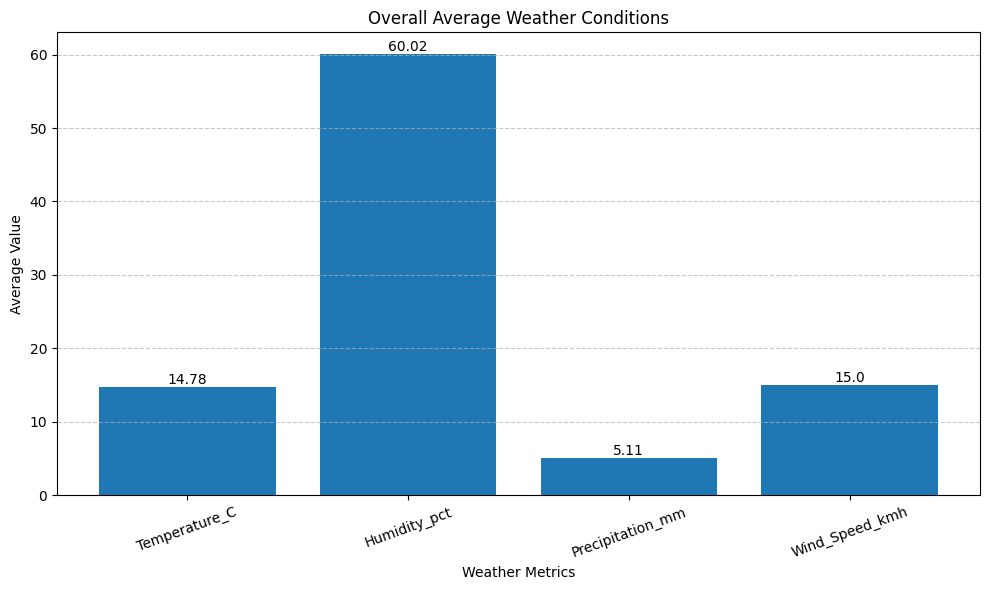

In [253]:
avg_values = df[['Temperature_C', 'Humidity_pct','Precipitation_mm', 'Wind_Speed_kmh']].mean().round(2)

x = avg_values.index
y = avg_values.values

plt.figure(figsize=(10,6))
plt.bar(x, y)

plt.xlabel('Weather Metrics')
plt.ylabel('Average Value')
plt.title('Overall Average Weather Conditions')

plt.xticks(rotation=20)

for i, value in enumerate(y):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The overall average weather conditions indicate a generally mild and moderately humid climate. The mean temperature across all observations is 14.78 °C, while the average humidity is 60.02%, suggesting moderate moisture in the air. Daily precipitation averages 5.11 mm, reflecting light to moderate rainfall on typical days, and the mean wind speed is 15.00 km/h, corresponding to gentle to moderate breezes. These values provide a baseline understanding of the general climate for the locations included in the dataset and can serve as a reference point for identifying extreme weather events, seasonal variations, and long-term trends.

### Average temperature, humidity, precipitation, and wind speed across different location

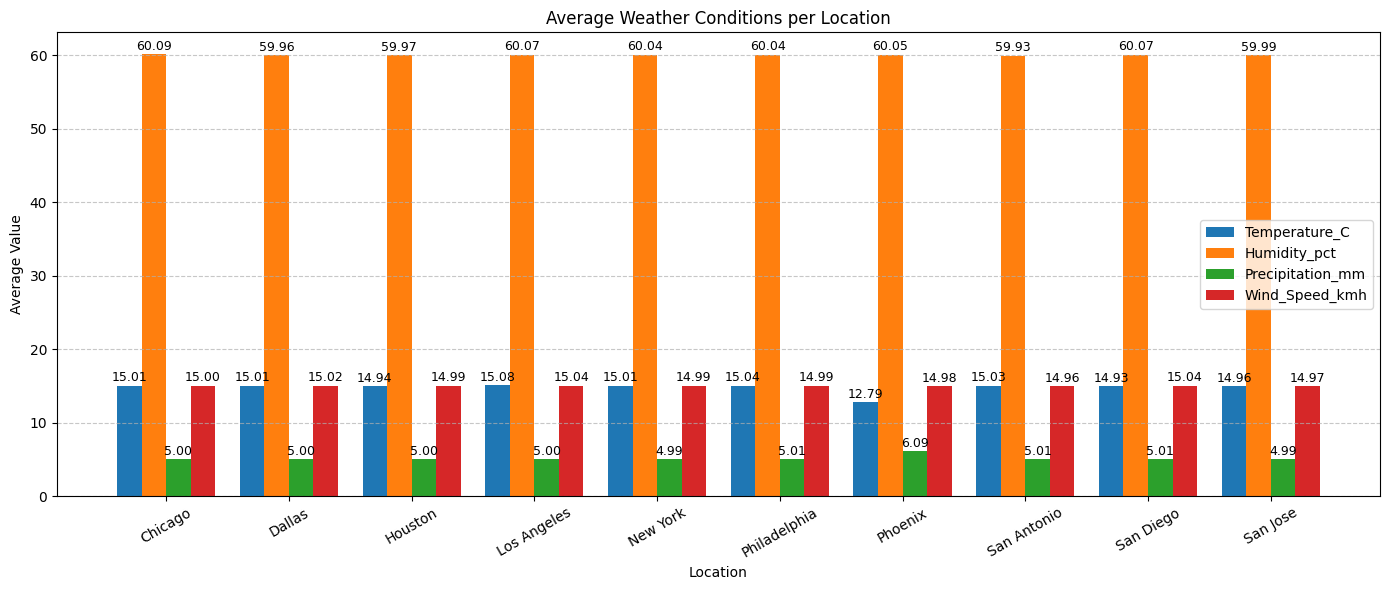

In [254]:
avg_per_location = (
    df.groupby('Location')[['Temperature_C', 'Humidity_pct',
    'Precipitation_mm', 'Wind_Speed_kmh']].mean().round(2)
)

locations = avg_per_location.index
metrics = avg_per_location.columns
x = np.arange(len(locations))
width = 0.2

plt.figure(figsize=(14,6))

for i, metric in enumerate(metrics):
    bars = plt.bar(x + i*width, avg_per_location[metric],
                    width=width, label=metric)
    

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=9)

plt.xlabel('Location')
plt.ylabel('Average Value')
plt.title('Average Weather Conditions per Location')
plt.xticks(x + width * (len(metrics)-1)/2, locations, rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The average weather conditions vary slightly across the observed locations. Temperature ranges from 12.79 °C in Phoenix, which is noticeably cooler, to 15.08 °C in Los Angeles, while most other cities, including Chicago, Dallas, New York, Philadelphia, and San Antonio, average around 15 °C. Humidity is relatively consistent across locations, averaging near 60%, with Dallas and San Antonio slightly lower at approximately 59.93–59.96%. Precipitation is also fairly uniform, with most locations around 5 mm, although Phoenix experiences higher average rainfall at 6.09 mm, and New York slightly lower at 4.99 mm. Wind speeds are generally moderate, averaging close to 15 km/h, with small differences such as San Antonio at 14.96 km/h and Los Angeles at 15.04 km/h. Overall, the data indicate a relatively stable climate across the cities studied, with Phoenix standing out for slightly lower temperatures and higher precipitation.

## Overall Temperature Over Time

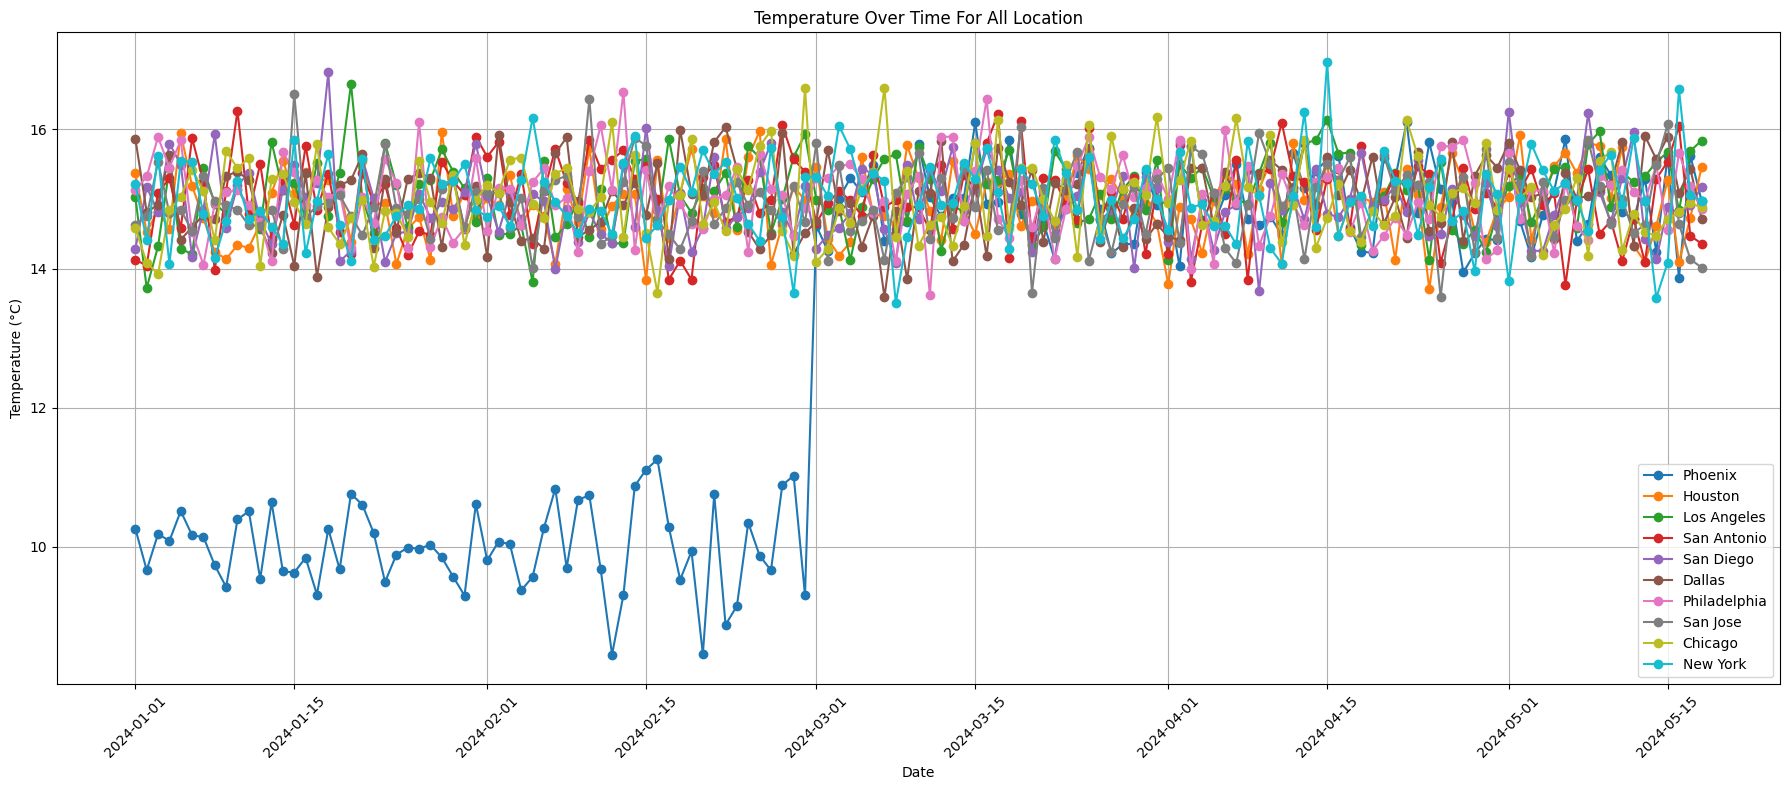

In [255]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

locations = df['Location'].unique()

plt.figure(figsize=(18,8))

for loc in locations:
    loc_data = df[df['Location'] == loc]
    daily_temp = loc_data.groupby(loc_data['Date_Time'].dt.date)['Temperature_C'].mean()
    x = daily_temp.index
    y = daily_temp.values
    plt.plot(x, y, marker='o', linestyle='-', label=loc)

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time For All Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The temperature data indicate that most locations maintain a relatively stable thermal pattern over time, with values consistently clustered between approximately 14 °C and 16 °C. This suggests minimal seasonal variation across these locations during the observed period. In contrast, Phoenix displays a distinct behavior, starting with noticeably lower temperatures in the earlier months before experiencing a sharp increase around March. This deviation implies a transition period or differing environmental conditions affecting Phoenix compared to the other cities. Overall, the limited variability and absence of extreme fluctuations across most locations indicate stable and predictable temperature behavior during the timeframe analyzed.


## Overall Humidity Over Time

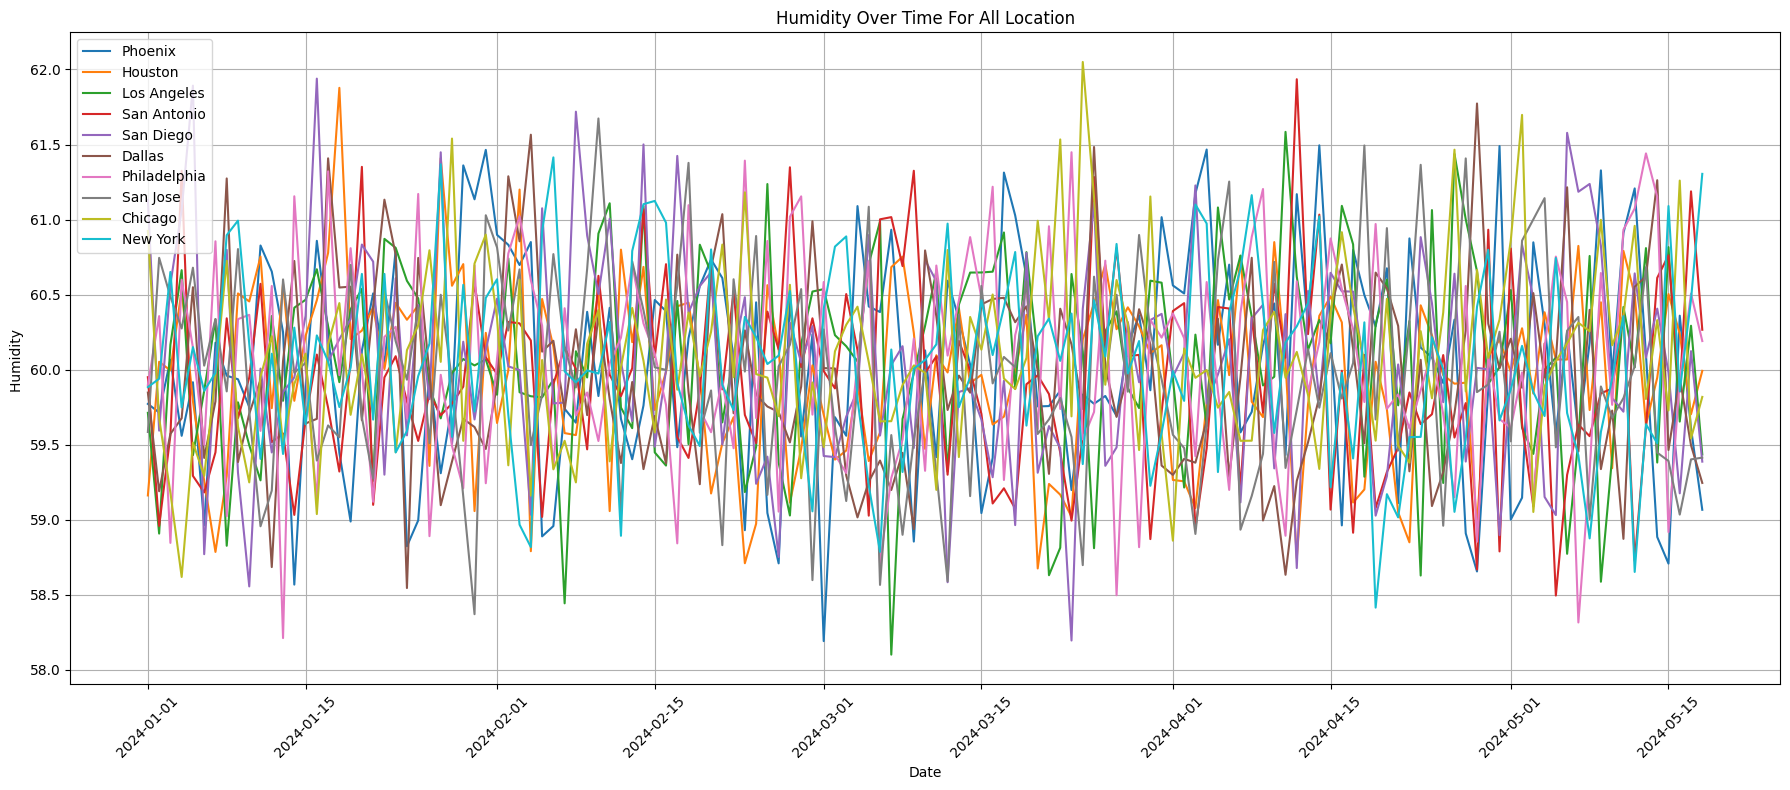

In [256]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

locations = df['Location'].unique()

plt.figure(figsize=(18,8))

for loc in locations:
    loc_data = df[df['Location'] == loc]
    daily_temp = loc_data.groupby(loc_data['Date_Time'].dt.date)['Humidity_pct'].mean()
    x = daily_temp.index
    y = daily_temp.values
    plt.plot(x, y, linestyle='-', label=loc)

plt.xlabel('Date')
plt.ylabel('Humidity ')
plt.title('Humidity Over Time For All Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The humidity levels across all locations remain relatively stable throughout the observed period, generally fluctuating around 58% to 62%. Short-term variations are present for all cities, reflecting normal day-to-day changes in atmospheric moisture; however, no sustained upward or downward trend is observed over time. The similarity in humidity ranges among the locations suggests consistent moisture conditions across regions during the study period. Occasional spikes and dips indicate transient weather effects rather than long-term shifts in humidity patterns.

## Overall Precipitation Over Time

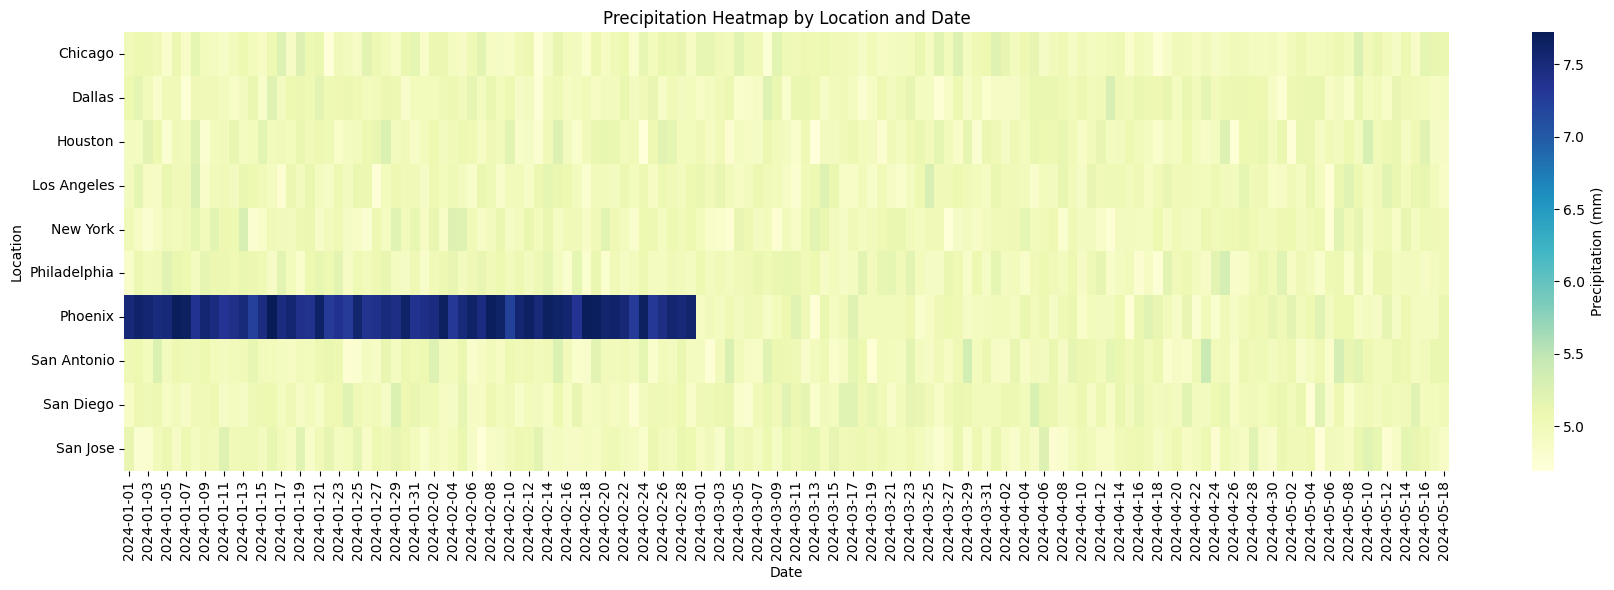

In [257]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date'] = df['Date_Time'].dt.date

precip_pivot = df.pivot_table(
    index='Date',
    columns='Location',
    values='Precipitation_mm',
    aggfunc='mean'
)

plt.figure(figsize=(18,6))
sns.heatmap(
    precip_pivot.T,
    cmap='YlGnBu',
    cbar_kws={'label': 'Precipitation (mm)'}
)

plt.title('Precipitation Heatmap by Location and Date')
plt.xlabel('Date')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

The heatmap primarily indicates low or zero precipitation across most locations and dates. A significant exception is a sustained period of heavy rainfall in Phoenix, which experienced consecutive high-level precipitation events from approximately January 10th through the end of February 2024, with daily measurements reaching the scale's maximum of 7.0 mm or more. Other cities like Chicago, Philadelphia, and New York showed only isolated days of significant rain during the period. This heatmap reflects the broader trend of a wetter-than-average start to 2024 for the said locations, which included notable weather events in various regions.

## Overall Wind Speed Over Time

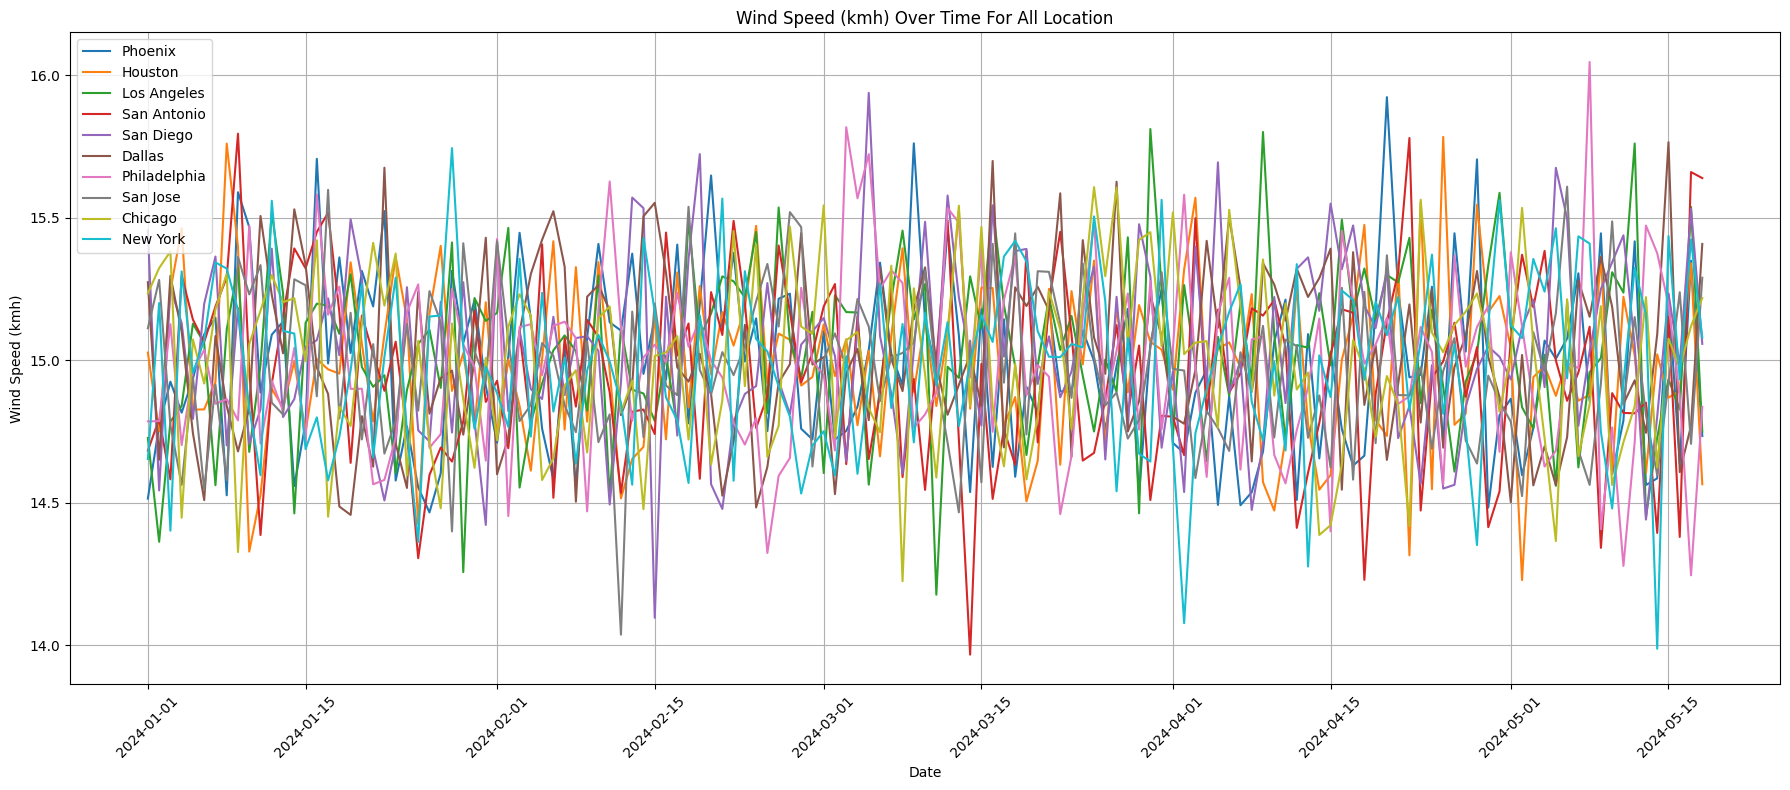

In [258]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

locations = df['Location'].unique()

plt.figure(figsize=(18,8))

for loc in locations:
    loc_data = df[df['Location'] == loc]
    daily_temp = loc_data.groupby(loc_data['Date_Time'].dt.date)['Wind_Speed_kmh'].mean()
    x = daily_temp.index
    y = daily_temp.values
    plt.plot(x, y, linestyle='-', label=loc)

plt.xlabel('Date')
plt.ylabel('Wind Speed (kmh)')
plt.title('Wind Speed (kmh) Over Time For All Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The line graph shows significant day-to-day variability across all locations, with speeds consistently fluctuating between approximately 14.0 km/h and 16.0 km/h. There are no clear seasonal trends, but rather rapid, sharp peaks and drops for individual cities. Key observations show that while most cities generally hover around the average range, several exhibit extreme spikes or dips at specific dates. For instance, there's a notable sharp peak in wind speed for San Diego just after March 1st, reaching close to 16.0 km/h, while simultaneously, another city registers a minimum wind speed of exactly 14.0 km/h. This graph emphasizes the highly dynamic nature of daily wind patterns across different major US metropolitan areas during this five-month period.

## Identify Seasonal Variations

In [259]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month'] = df['Date_Time'].dt.month
df['Year'] = df['Date_Time'].dt.year

In [260]:
monthly_avg = (
    df.groupby('Month')[['Temperature_C', 'Humidity_pct',
    'Precipitation_mm', 'Wind_Speed_kmh']].mean().round(2)
)
monthly_avg

Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh
Month                                                               
1              14.45         60.02              5.26           14.98
2              14.50         60.07              5.25           15.00
3              15.01         59.99              5.00           15.03
4              15.00         60.01              5.00           14.99
5              15.04         60.03              5.01           14.98

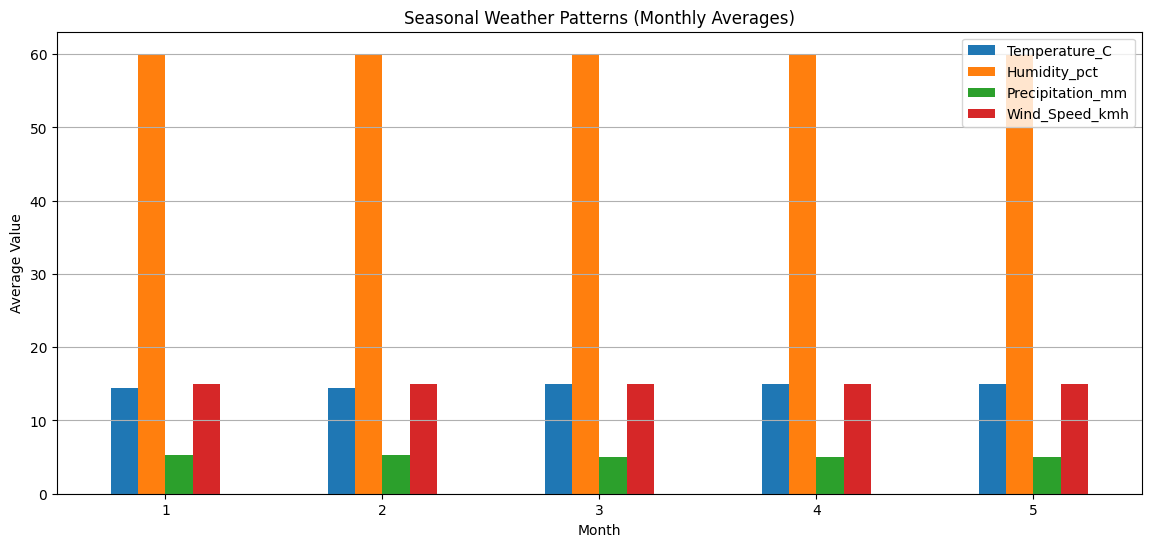

In [261]:
monthly_avg.plot(kind='bar', figsize=(14,6))
plt.title('Seasonal Weather Patterns (Monthly Averages)')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The provided data summarizes highly consistent average monthly weather conditions (temperature, humidity, precipitation, and wind speed) from January through May. Temperatures show a minor but steady increase from (14.45°C) in January to over (15°C) by May, while humidity levels remain remarkably stable, consistently near 60%. Precipitation averages decrease slightly from an initial (5.26mm) in January down to (5.00mm) in April and May, and wind speeds are virtually constant, averaging approximately (15.00 km/h) across all five months. This overall consistency suggests a period with very little seasonal variation in these specific metrics.

## Identifying Extremely High Temperature, Precipitation, Wind Speed, and Humidity per Location

In [262]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date'] = df['Date_Time'].dt.date

In [263]:
daily_df = (
    df.groupby(['Location', 'Date']).agg({
        'Temperature_C': 'mean',
        'Precipitation_mm': 'mean',
        'Wind_Speed_kmh': 'mean',
        'Humidity_pct': 'mean'
    }).reset_index()
)

In [264]:
temp_thresh = daily_df.groupby('Location')['Temperature_C'].quantile(0.95)
rain_thresh = daily_df.groupby('Location')['Precipitation_mm'].quantile(0.95)
wind_thresh = daily_df.groupby('Location')['Wind_Speed_kmh'].quantile(0.95)
humidity_thresh = daily_df.groupby('Location')['Humidity_pct'].quantile(0.95)

In [265]:
daily_df['Extreme_Temp'] = daily_df.apply(
    lambda r: r['Temperature_C'] >= temp_thresh[r['Location']], axis=1
)

daily_df['Extreme_Rain'] = daily_df.apply(
    lambda r: r['Precipitation_mm'] >= rain_thresh[r['Location']], axis=1
)

daily_df['Extreme_Wind'] = daily_df.apply(
    lambda r: r['Wind_Speed_kmh'] >= wind_thresh[r['Location']], axis=1
)

daily_df['Extreme_Humidity'] = daily_df.apply(
    lambda r: r['Humidity_pct'] >= wind_thresh[r['Location']], axis=1
)

### Extreme Temperature per Location

In [266]:
extreme_temp = daily_df[daily_df['Extreme_Temp']]
print("=== Extreme Temperature Events ===")
for loc in extreme_temp['Location'].unique():
    loc_data = extreme_temp[extreme_temp['Location'] == loc]
    print(f"\nLocation: {loc}")
    for _, row in loc_data.iterrows():
        print(f"Date: {row['Date']}, Temperature: {row['Temperature_C']}°C")

=== Extreme Temperature Events ===

Location: Chicago
Date: 2024-02-12, Temperature: 16.101577424023155°C
Date: 2024-02-29, Temperature: 16.590792767732964°C
Date: 2024-03-07, Temperature: 16.600600272851295°C
Date: 2024-03-17, Temperature: 16.13590344827586°C
Date: 2024-03-31, Temperature: 16.182312746386334°C
Date: 2024-04-07, Temperature: 16.15710826210826°C
Date: 2024-04-22, Temperature: 16.136075268817205°C

Location: Dallas
Date: 2024-02-02, Temperature: 15.911710526315789°C
Date: 2024-02-08, Temperature: 15.883983739837397°C
Date: 2024-02-18, Temperature: 15.993475073313782°C
Date: 2024-02-22, Temperature: 16.030736278447122°C
Date: 2024-02-27, Temperature: 15.941523272214388°C
Date: 2024-05-13, Temperature: 15.906133720930233°C
Date: 2024-05-15, Temperature: 15.89445652173913°C

Location: Houston
Date: 2024-01-05, Temperature: 15.941533052039382°C
Date: 2024-01-28, Temperature: 15.966702412868633°C
Date: 2024-02-22, Temperature: 15.862812499999999°C
Date: 2024-02-25, Temperatur

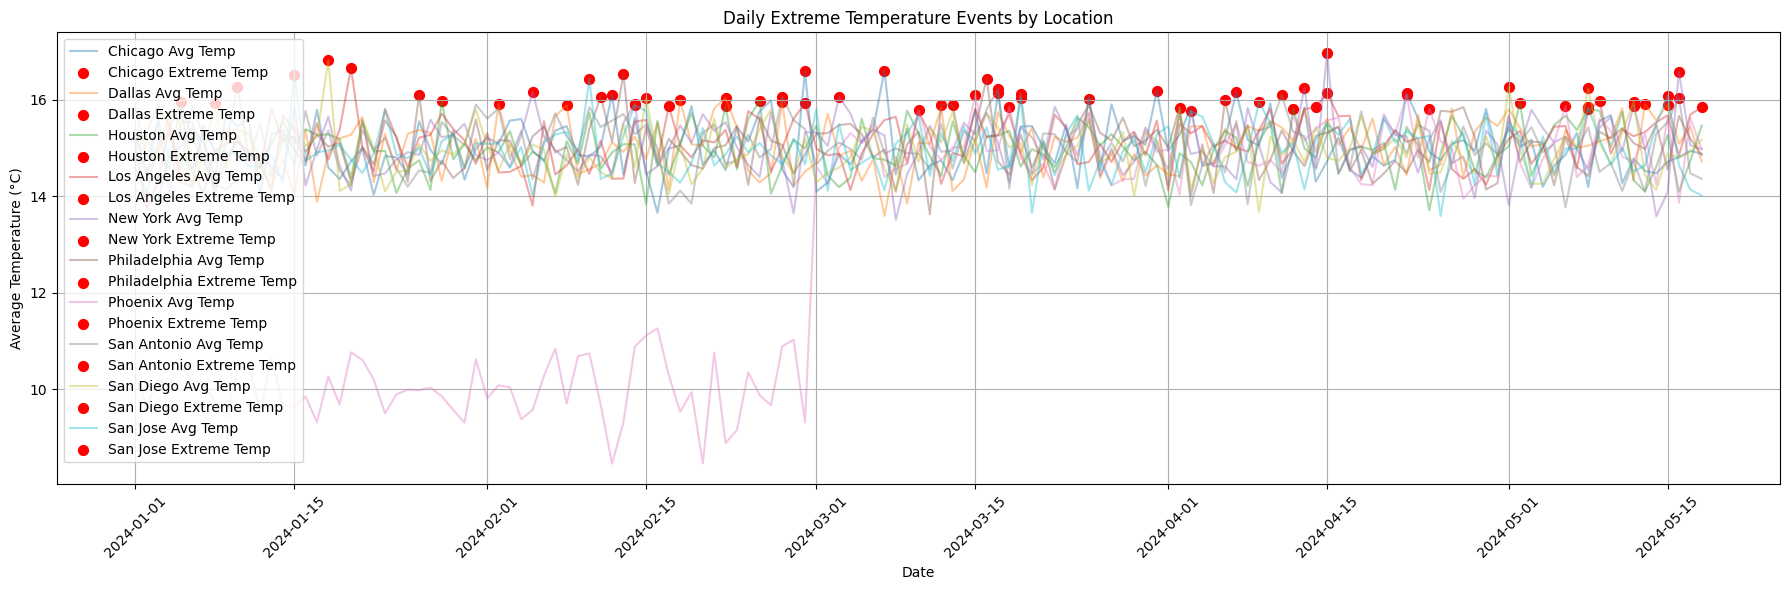

In [267]:
plt.figure(figsize=(18,6))

for loc in daily_df['Location'].unique():
    loc_data = daily_df[daily_df['Location'] == loc]

    plt.plot(
        loc_data['Date'],
        loc_data['Temperature_C'],
        alpha=0.4,
        label=f'{loc} Avg Temp'
    )

    extreme = loc_data[loc_data['Extreme_Temp']]
    plt.scatter(
        extreme['Date'],
        extreme['Temperature_C'],
        s=50,
        color='red',
        label=f'{loc} Extreme Temp'
    )

plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Daily Extreme Temperature Events by Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Extreme temperature events varied across the observed locations during the study period. Chicago experienced several days in February through April with temperatures above its typical range, peaking around 16.6 °C in early March. Dallas showed extreme temperatures mainly in February and May, reaching just over 16 °C, while Houston recorded similar extremes between January and May, with temperatures near 15.97 °C. Los Angeles saw its highest extreme in January at approximately 16.65 °C, with additional notable days in February, April, and May. New York experienced extreme temperatures primarily in February and April, with a peak of 16.97 °C in mid-April, whereas Philadelphia recorded several extreme days between January and April, reaching up to 16.53 °C. Phoenix had extreme events mostly between March and May, peaking at 16.10 °C, and San Antonio experienced multiple extreme days from January to May, with temperatures just over 16.26 °C. San Diego showed the highest extreme in January (16.82 °C), with additional peaks in February, April, and May. Finally, San Jose experienced extreme temperatures throughout January to May, peaking around 16.51 °C in mid-January. Overall, the data indicate that extreme temperature events occurred across all locations, mostly during late winter and spring, with Los Angeles, San Diego, and San Jose showing slightly higher peaks compared to other cities.

### Extreme Precipitation per Location

In [268]:
extreme_rain = daily_df[daily_df['Extreme_Rain']]
print("\n=== Extreme Rain Events ===")
for loc in extreme_rain['Location'].unique():
    loc_data = extreme_rain[extreme_rain['Location'] == loc]
    print(f"\nLocation: {loc}")
    for _, row in loc_data.iterrows():
        print(f"Date: {row['Date']}, Precipitation: {row['Precipitation_mm']} mm")


=== Extreme Rain Events ===

Location: Chicago
Date: 2024-01-17, Precipitation: 5.248882833787466 mm
Date: 2024-01-19, Precipitation: 5.23472334682861 mm
Date: 2024-03-09, Precipitation: 5.185467224546723 mm
Date: 2024-03-26, Precipitation: 5.18935393258427 mm
Date: 2024-03-28, Precipitation: 5.2433905579399145 mm
Date: 2024-04-01, Precipitation: 5.215063113604488 mm
Date: 2024-05-09, Precipitation: 5.266246376811594 mm

Location: Dallas
Date: 2024-01-02, Precipitation: 5.164131326949384 mm
Date: 2024-01-16, Precipitation: 5.222701227830832 mm
Date: 2024-01-21, Precipitation: 5.17004329004329 mm
Date: 2024-02-06, Precipitation: 5.153319502074688 mm
Date: 2024-03-08, Precipitation: 5.233158620689655 mm
Date: 2024-04-13, Precipitation: 5.2954937413073715 mm
Date: 2024-04-23, Precipitation: 5.164543080939947 mm

Location: Houston
Date: 2024-01-08, Precipitation: 5.21934693877551 mm
Date: 2024-01-28, Precipitation: 5.2557238605898124 mm
Date: 2024-02-15, Precipitation: 5.237713884992987 m

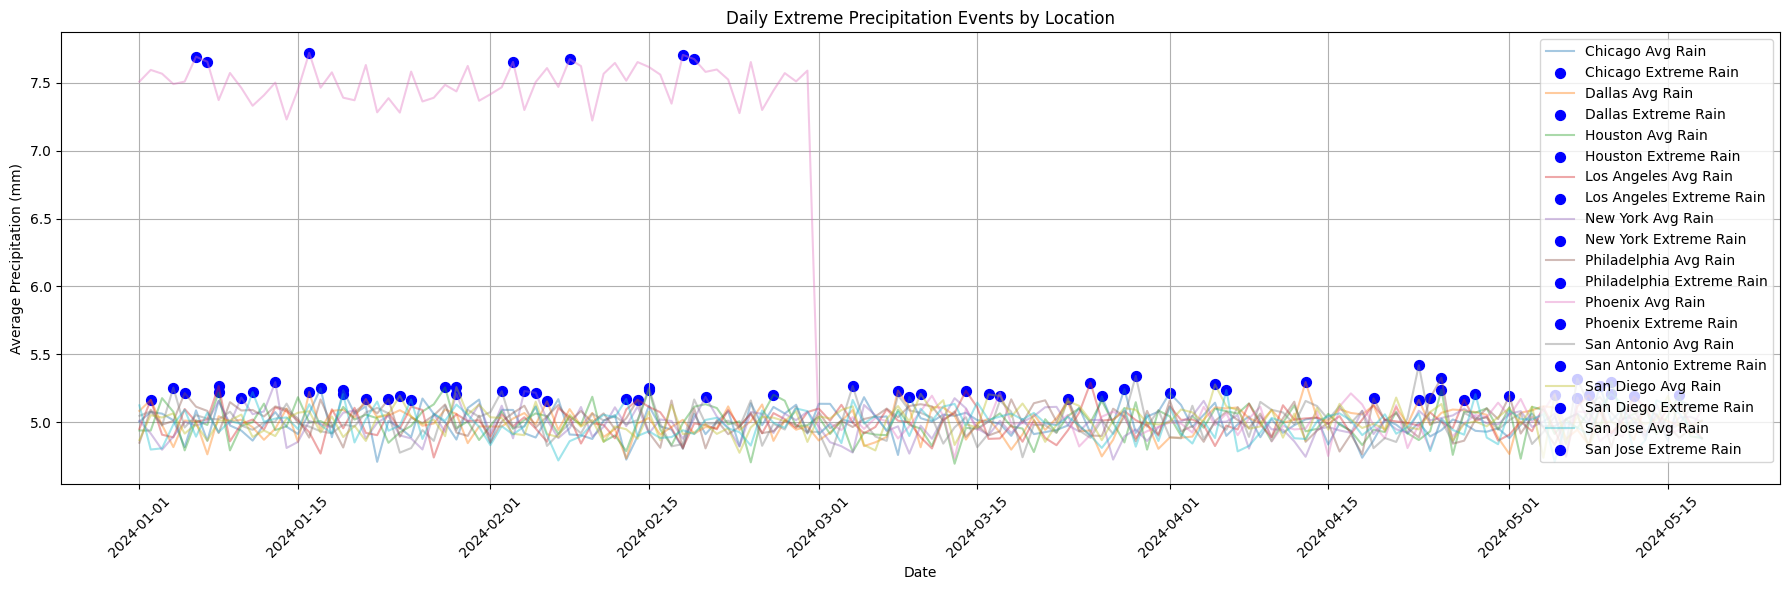

In [269]:
plt.figure(figsize=(18,6))

for loc in daily_df['Location'].unique():
    loc_data = daily_df[daily_df['Location'] == loc]

    plt.plot(
        loc_data['Date'],
        loc_data['Precipitation_mm'],
        alpha=0.4,
        label=f'{loc} Avg Rain'
    )

    extreme = loc_data[loc_data['Extreme_Rain']]
    plt.scatter(
        extreme['Date'],
        extreme['Precipitation_mm'],
        s=50,
        color='blue',
        label=f'{loc} Extreme Rain'
    )

plt.xlabel('Date')
plt.ylabel('Average Precipitation (mm)')
plt.title('Daily Extreme Precipitation Events by Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Extreme rainfall events were observed across all locations during the study period, with notable variations between cities. Chicago experienced several heavy rain days between January and May, with daily precipitation peaking around 5.27 mm. Similarly, Dallas saw extreme rain primarily from January through April, reaching about 5.30 mm, while Houston recorded comparable peaks during January to May, with a maximum of 5.30 mm. Los Angeles had its highest daily rainfall in March at approximately 5.29 mm, with additional extreme days scattered from January to May. New York and Philadelphia experienced extreme precipitation mostly in the early months of the year, with peak daily rainfall around 5.29–5.33 mm. Phoenix stood out for significantly higher extremes, with precipitation between 7.65 and 7.72 mm occurring primarily in January and February. San Antonio saw extreme rain events from January to May, reaching up to 5.42 mm, while San Diego and San Jose experienced peaks between 5.20 and 5.28 mm, distributed across early spring months. Overall, the data indicate that extreme rainfall events were relatively consistent across most cities, except for Phoenix, which experienced substantially higher precipitation, highlighting regional differences in rainfall intensity.

### Extreme Wind Speed per Location

In [270]:
extreme_wind = daily_df[daily_df['Extreme_Wind']]
print("\n=== Extreme Wind Events ===")
for loc in extreme_wind['Location'].unique():
    loc_data = extreme_wind[extreme_wind['Location'] == loc]
    print(f"\nLocation: {loc}")
    for _, row in loc_data.iterrows():
        print(f"Date: {row['Date']}, Wind Speed: {row['Wind_Speed_kmh']} km/h")


=== Extreme Wind Events ===

Location: Chicago
Date: 2024-03-01, Wind Speed: 15.543288043478261 km/h
Date: 2024-03-13, Wind Speed: 15.542055944055944 km/h
Date: 2024-03-25, Wind Speed: 15.60699604743083 km/h
Date: 2024-03-27, Wind Speed: 15.606043956043957 km/h
Date: 2024-04-06, Wind Speed: 15.52747559274756 km/h
Date: 2024-04-23, Wind Speed: 15.563016304347824 km/h
Date: 2024-05-02, Wind Speed: 15.53435656836461 km/h

Location: Dallas
Date: 2024-01-14, Wind Speed: 15.529251968503939 km/h
Date: 2024-01-22, Wind Speed: 15.67538888888889 km/h
Date: 2024-02-15, Wind Speed: 15.552019230769233 km/h
Date: 2024-03-16, Wind Speed: 15.699019033674963 km/h
Date: 2024-03-22, Wind Speed: 15.5855376344086 km/h
Date: 2024-03-27, Wind Speed: 15.626039215686275 km/h
Date: 2024-05-15, Wind Speed: 15.765067934782609 km/h

Location: Houston
Date: 2024-01-08, Wind Speed: 15.759931972789115 km/h
Date: 2024-03-13, Wind Speed: 15.523152317880793 km/h
Date: 2024-04-03, Wind Speed: 15.569819193324062 km/h
Dat

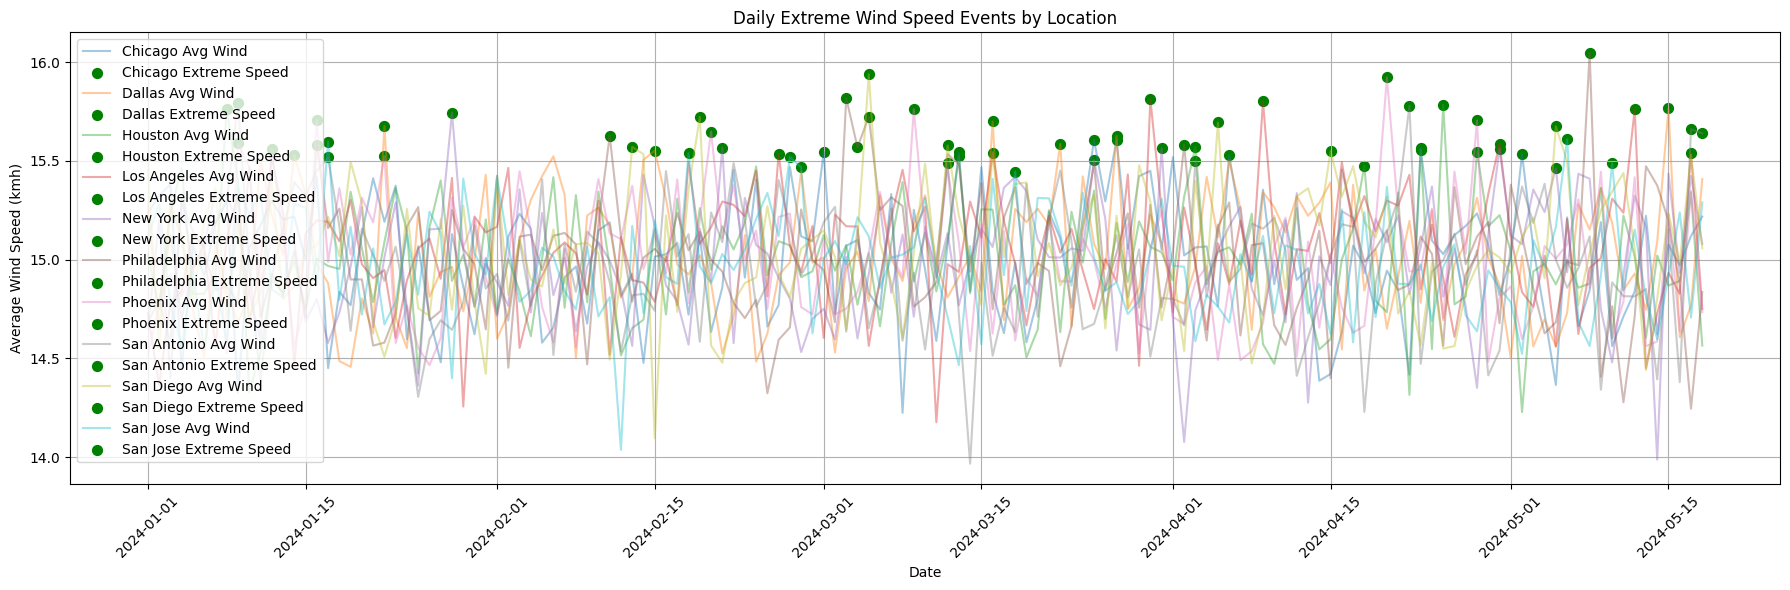

In [271]:
plt.figure(figsize=(18,6))

for loc in daily_df['Location'].unique():
    loc_data = daily_df[daily_df['Location'] == loc]

    plt.plot(
        loc_data['Date'],
        loc_data['Wind_Speed_kmh'],
        alpha=0.4,
        label=f'{loc} Avg Wind'
    )

    extreme = loc_data[loc_data['Extreme_Wind']]
    plt.scatter(
        extreme['Date'],
        extreme['Wind_Speed_kmh'],
        s=50,
        color='green',
        label=f'{loc} Extreme Speed'
    )

plt.xlabel('Date')
plt.ylabel('Average Wind Speed (kmh)')
plt.title('Daily Extreme Wind Speed Events by Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Extreme wind events were recorded across all locations, showing generally moderate but occasionally higher gusts. Chicago experienced notable wind speeds in March through May, peaking at approximately 15.61 km/h. Dallas recorded its strongest winds between January and May, with a maximum of 15.77 km/h, while Houston saw extreme wind days mainly in January and April, reaching around 15.78 km/h. Los Angeles had its highest gusts in late March and early April, peaking at 15.81 km/h, with additional notable days in May. New York experienced extreme wind events from January through May, mostly staying below 15.75 km/h, whereas Philadelphia recorded a peak wind speed of 16.05 km/h in early May. Phoenix saw its strongest winds in April at 15.92 km/h, while San Antonio recorded maximum wind speeds of approximately 15.79 km/h between January and May. Both San Diego and San Jose experienced extreme wind events throughout February to May, peaking at around 15.94 km/h in early March for San Diego and 15.61 km/h in May for San Jose. Overall, while wind speeds remained moderate across most cities, occasional peaks highlight days of stronger winds, particularly in Philadelphia, San Diego, and Phoenix.

### Extremely High Humidity per Location

In [272]:
extreme_wind = daily_df[daily_df['Extreme_Humidity']]
print("\n=== Extreme Humidity Events ===")
for loc in extreme_wind['Location'].unique():
    loc_data = extreme_wind[extreme_wind['Location'] == loc]
    print(f"\nLocation: {loc}")
    for _, row in loc_data.iterrows():
        print(f"Date: {row['Date']}, Humidity: {row['Humidity_pct']} %")


=== Extreme Humidity Events ===

Location: Chicago
Date: 2024-01-01, Humidity: 60.924473684210525 %
Date: 2024-01-02, Humidity: 59.67634146341464 %
Date: 2024-01-03, Humidity: 59.17880108991825 %
Date: 2024-01-04, Humidity: 58.61809859154929 %
Date: 2024-01-05, Humidity: 59.513560910307895 %
Date: 2024-01-06, Humidity: 59.291940509915015 %
Date: 2024-01-07, Humidity: 59.955971223021585 %
Date: 2024-01-08, Humidity: 60.72499300699301 %
Date: 2024-01-09, Humidity: 59.62014265335235 %
Date: 2024-01-10, Humidity: 59.248487874465056 %
Date: 2024-01-11, Humidity: 59.95279944289694 %
Date: 2024-01-12, Humidity: 60.22294281729428 %
Date: 2024-01-13, Humidity: 59.510221606648194 %
Date: 2024-01-14, Humidity: 59.904545454545456 %
Date: 2024-01-15, Humidity: 60.10628075253256 %
Date: 2024-01-16, Humidity: 59.0372191011236 %
Date: 2024-01-17, Humidity: 60.16806539509537 %
Date: 2024-01-18, Humidity: 60.443318713450296 %
Date: 2024-01-19, Humidity: 59.69877192982456 %
Date: 2024-01-20, Humidity: 6

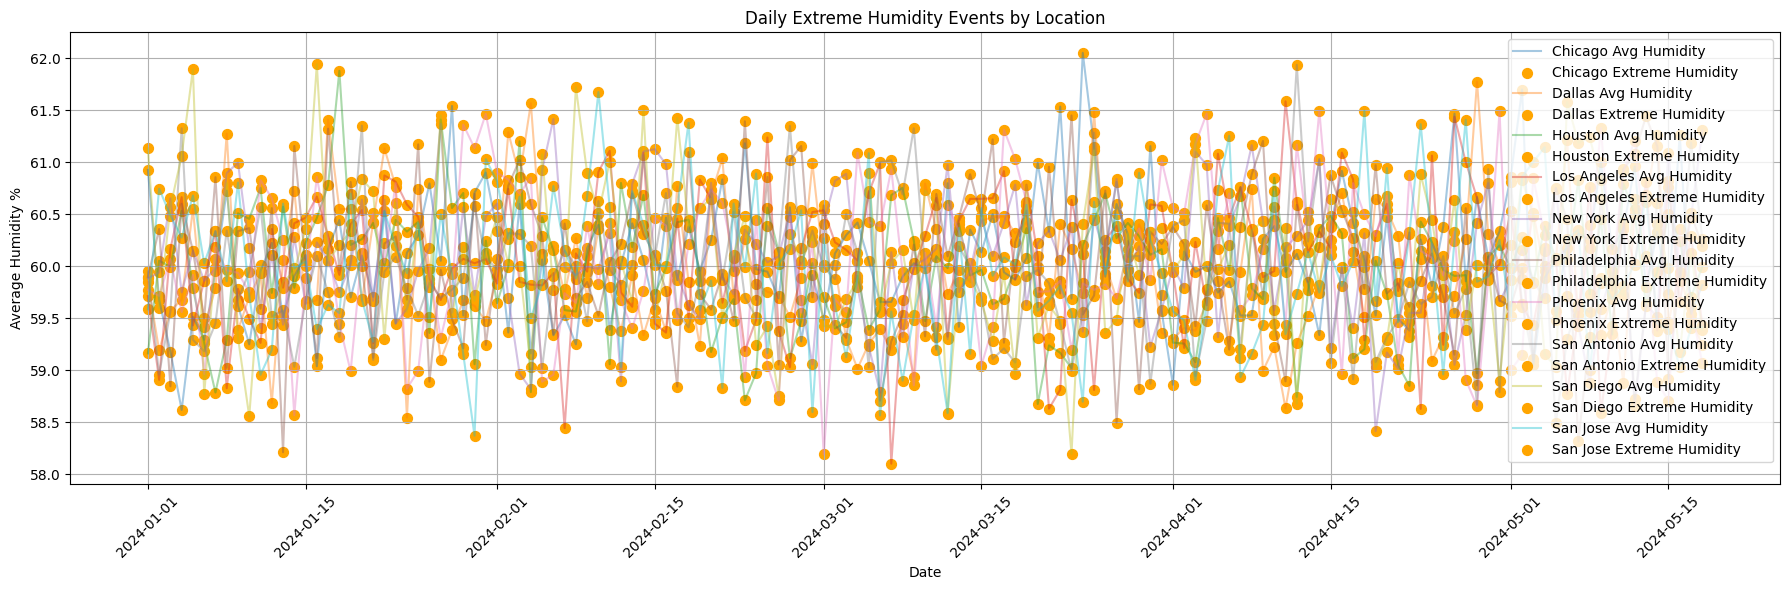

In [273]:
plt.figure(figsize=(18,6))

for loc in daily_df['Location'].unique():
    loc_data = daily_df[daily_df['Location'] == loc]

    plt.plot(
        loc_data['Date'],
        loc_data['Humidity_pct'],
        alpha=0.4,
        label=f'{loc} Avg Humidity'
    )

    extreme = loc_data[loc_data['Extreme_Humidity']]
    plt.scatter(
        extreme['Date'],
        extreme['Humidity_pct'],
        s=50,
        color='orange',
        label=f'{loc} Extreme Humidity'
    )

plt.xlabel('Date')
plt.ylabel('Average Humidity %')
plt.title('Daily Extreme Humidity Events by Location')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The observed humidity data indicate that all analyzed locations experienced consistently high relative humidity levels throughout the study period, with daily values predominantly clustering around 59–61%. Rather than exhibiting sharp, isolated spikes, the data suggest prolonged periods of elevated humidity, which reflects stable atmospheric moisture conditions. Among the cities, Chicago recorded the highest humidity levels, with several days exceeding 61%, including a peak of approximately 62%. These values represent the most pronounced humidity events in the dataset. Houston also showed persistently high humidity, frequently maintaining values above 60%, consistent with its humid climatic profile. Dallas experienced moderate variability, with fewer extreme humidity occurrences and occasional peaks slightly above 61%. Los Angeles exhibited the least variability overall, with only limited instances of humidity exceeding 61%. While, New York, Philadelphia, Phoenix, and San Antonio, humidity levels remain remarkably stable throughout the study period, with values consistently clustering around 58%–62%. Day-to-day fluctuations are observed in all cities; however, these variations are minor and short-term, indicating normal atmospheric variability rather than significant weather shifts. Meanwhile, the humidity levels in San Diego and San Jose remained relatively stable. In San Diego, humidity ranged from a minimum of 58.19% on March 23 to a maximum of 61.94% on January 16, with an average of approximately 60.1%. Daily humidity mostly stayed between 59% and 61%, showing slight increases in mid-January and early February, but overall, the variation was minor. Similarly, San Jose exhibited consistent humidity levels, ranging from 58.37% on January 30 to 61.49% on April 18, with an average of around 60.0%. The fluctuations were moderate, with peaks occurring in early February and mid-April. Overall, both cities experienced mild and stable humidity during this period, reflecting the typical patterns of coastal climates in California.